<a href="https://colab.research.google.com/github/brayanricardo13/Mercado-de-capitales/blob/main/Capital_Asset_Pricing_Model_(CAPM)_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Capital Asset Pricing Model**:
\begin{equation}
 E[r_{a}] = r_{f} + \\beta_{a}(E[r_{m}]- r_{f})
\end{equation}

In [ ]:
pip install yfinance

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import yfinance as yf 

In [13]:
yf.pdr_override() 

In [4]:
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

In [ ]:
stock_a =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2019-01-01') 
end = pd.to_datetime('2022-01-01')

data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']

In [ ]:
data_a.head()

In [ ]:
M_stock_a = data_a.resample('M').last()
M_stock_m = data_m.resample('M').last()

data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
data.head()

In [ ]:
data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
data.dropna(inplace=True)
data.head()

In [ ]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)
sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data)
plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
plt.show()

In [37]:
beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
print('Beta from CAPM formula: ',beta_form.round(4))

Beta from CAPM formula:  1.2723


In [ ]:
beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
print('Beta from Linear Regression: ',beta_reg.round(4))
print('Alpha: ', alpha.round(3))

In [ ]:
plt.figure(figsize = (13,9))

plt.axvline(0, color='grey', alpha = 0.5)
plt.axhline(0, color='grey', alpha = 0.5)

sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')



plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))

plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

plt.show()

In [40]:
def CAPM(stock_a,stock_m,start, end):
    
    data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
    data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']
    
    M_stock_a = data_a.resample('M').last()
    M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'Inv_Close':M_stock_a, 'Markt_Close': M_stock_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
   

 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))
    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()

In [ ]:
stock_a =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

In [ ]:
stock_a =['GE']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

In [ ]:
stock_a =['AMD']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')

CAPM(stock_a,stock_m,start, end)

In [44]:
def CAPM_daily(stock_a,stock_m,start, end):
    
    data_a = pdr.get_data_yahoo(stock_a, start=start, end=end)['Adj Close']
    data_m = pdr.get_data_yahoo(stock_m, start=start, end=end)['Adj Close']
    
    #M_stock_a = data_a.resample('M').last()
    #M_stock_m = data_m.resample('M').last()
    
    data = pd.DataFrame({'Inv_Close':data_a, 'Markt_Close': data_m})
    data[['Inv_Ret','Markt_Ret']] = np.log(data[['Inv_Close','Markt_Close']]/data[['Inv_Close','Markt_Close']].shift(1))
    data.dropna(inplace=True)
    
    beta_form = (data[['Inv_Ret','Markt_Ret']].cov()/data['Markt_Ret'].var()).iloc[0].iloc[1]
    beta_reg, alpha = np.polyfit(x = data['Markt_Ret'] , y = data['Inv_Ret'] ,deg = 1)
   

 
    print('\n')
    print(20*'==')
    print('Beta from formula: ',beta_form.round(4))
    print('Beta from Linear Regression: ',beta_reg.round(4))
    print('Alpha: ', alpha.round(3))
    print(20*'==')
    
    plt.figure(figsize = (13,9))
    
    plt.axvline(0, color='grey', alpha = 0.5)
    plt.axhline(0, color='grey', alpha = 0.5)

    sns.scatterplot(y = 'Inv_Ret', x = 'Markt_Ret', data = data, label = 'Returns')
    sns.lineplot(x = data['Markt_Ret'], y = alpha + data['Markt_Ret']*beta_reg, color = 'red', label = 'CAPM Line')

    plt.xlabel('Market Monthly Return: {}'.format(stock_m[0]))
    plt.ylabel('Investment Monthly Return: {}'.format(stock_a[0]))
    plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

    plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Beta from formula:  0.9769
Beta from Linear Regression:  0.9769
Alpha:  0.0


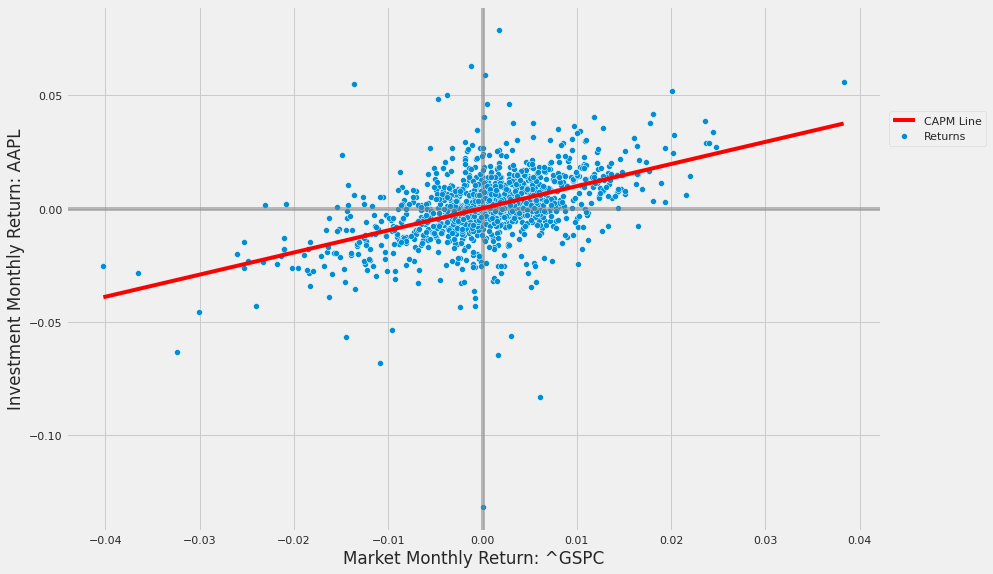

In [45]:
stock_a =['AAPL']
stock_m = ['^GSPC']

start = pd.to_datetime('2013-01-01') 
end = pd.to_datetime('2018-01-01')

CAPM_daily(stock_a,stock_m,start, end)